<a href="https://colab.research.google.com/github/AramBughdaryan/UAV-Battery-Estimation/blob/main/dataset/dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import pandas as pd
import glob

file_pattern = "/content/drive/My Drive/ML/train/flight*.csv"

file_paths = sorted(glob.glob(file_pattern))

df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

df.head()


,timestamp,throttle,pitch,roll,yaw,battery_current,altitude,latitude,longitude
0,652.373599,0.0,-1.5,-5.23,312.95,0.005466,832.860000,0.021077,0.711321
1,652.376250,0.0,-1.5,-5.23,312.95,0.005466,832.860000,0.021077,0.711321
2,652.376329,0.0,-1.5,-5.23,312.95,0.005466,832.860013,0.021077,0.711321
3,652.377348,0.0,-1.5,-5.23,312.95,0.005466,832.860185,0.021077,0.711321
4,652.377541,0.0,-1.5,-5.23,312.95,0.005467,832.860218,0.021077,0.711321


# Basic Information

In [6]:
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nFirst 5 Rows:")
print(df.head())


Dataset Shape: (1659414, 9)

Column Data Types:
timestamp          float64
throttle           float64
pitch              float64
roll               float64
yaw                float64
battery_current    float64
altitude           float64
latitude           float64
longitude          float64
dtype: object

First 5 Rows:
    timestamp  throttle  pitch  roll     yaw  battery_current    altitude  \
0  652.373599       0.0   -1.5 -5.23  312.95         0.005466  832.860000   
1  652.376250       0.0   -1.5 -5.23  312.95         0.005466  832.860000   
2  652.376329       0.0   -1.5 -5.23  312.95         0.005466  832.860013   
3  652.377348       0.0   -1.5 -5.23  312.95         0.005466  832.860185   
4  652.377541       0.0   -1.5 -5.23  312.95         0.005467  832.860218   

   latitude  longitude  
0  0.021077   0.711321  
1  0.021077   0.711321  
2  0.021077   0.711321  
3  0.021077   0.711321  
4  0.021077   0.711321  


# Descriptive Statistic

In [8]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
          timestamp      throttle         pitch          roll           yaw  \
count  1.659414e+06  1.659414e+06  1.659414e+06  1.659414e+06  1.659414e+06   
mean   1.688955e+03  3.945893e-01  3.651038e+00  3.346891e+00  1.816309e+02   
std    8.998408e+02  2.973715e-01  1.786099e+01  1.640398e+01  1.013663e+02   
min    9.947314e+01  0.000000e+00 -8.108000e+01 -1.799500e+02  0.000000e+00   
25%    9.986740e+02  1.400387e-01 -2.610406e+00 -2.525167e+00  1.010455e+02   
50%    1.607785e+03  3.600000e-01  3.339714e+00  1.839180e+00  2.014800e+02   
75%    2.208374e+03  6.500000e-01  1.747000e+01  1.234228e+01  2.575438e+02   
max    4.397534e+03  1.000000e+00  6.694000e+01  1.799300e+02  3.599900e+02   

       battery_current      altitude      latitude     longitude  
count     1.659414e+06  1.659414e+06  1.659414e+06  1.659414e+06  
mean      2.299515e-01  1.205017e+03  2.184944e-02  6.852461e-01  
std       2.503327e-01  2.716204e+02  5.178512e-03  1.382833e-

# Missing Values Analysis

In [16]:
    missing_summary = df.isnull().sum().to_frame("Missing Values")
    missing_summary["Percentage"] = (missing_summary["Missing Values"] / len(df)) * 100

    # Display the missing values summary
    print("Missing Values Overview:")
    print(missing_summary)

Missing Values Overview:
                 Missing Values  Percentage
timestamp                     0         0.0
throttle                      0         0.0
pitch                         0         0.0
roll                          0         0.0
yaw                           0         0.0
battery_current               0         0.0
altitude                      0         0.0
latitude                      0         0.0
longitude                     0         0.0


# Data Distribution & Outlier Detection

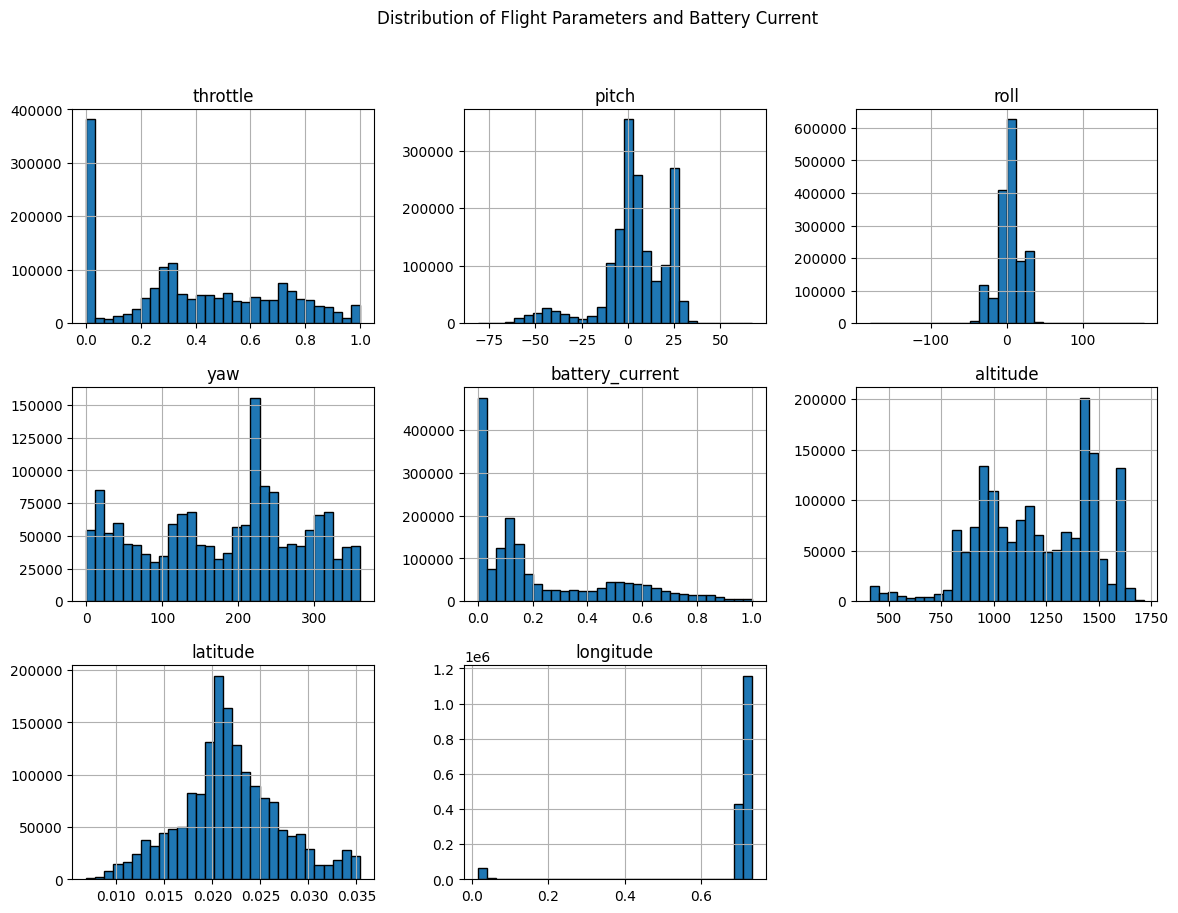

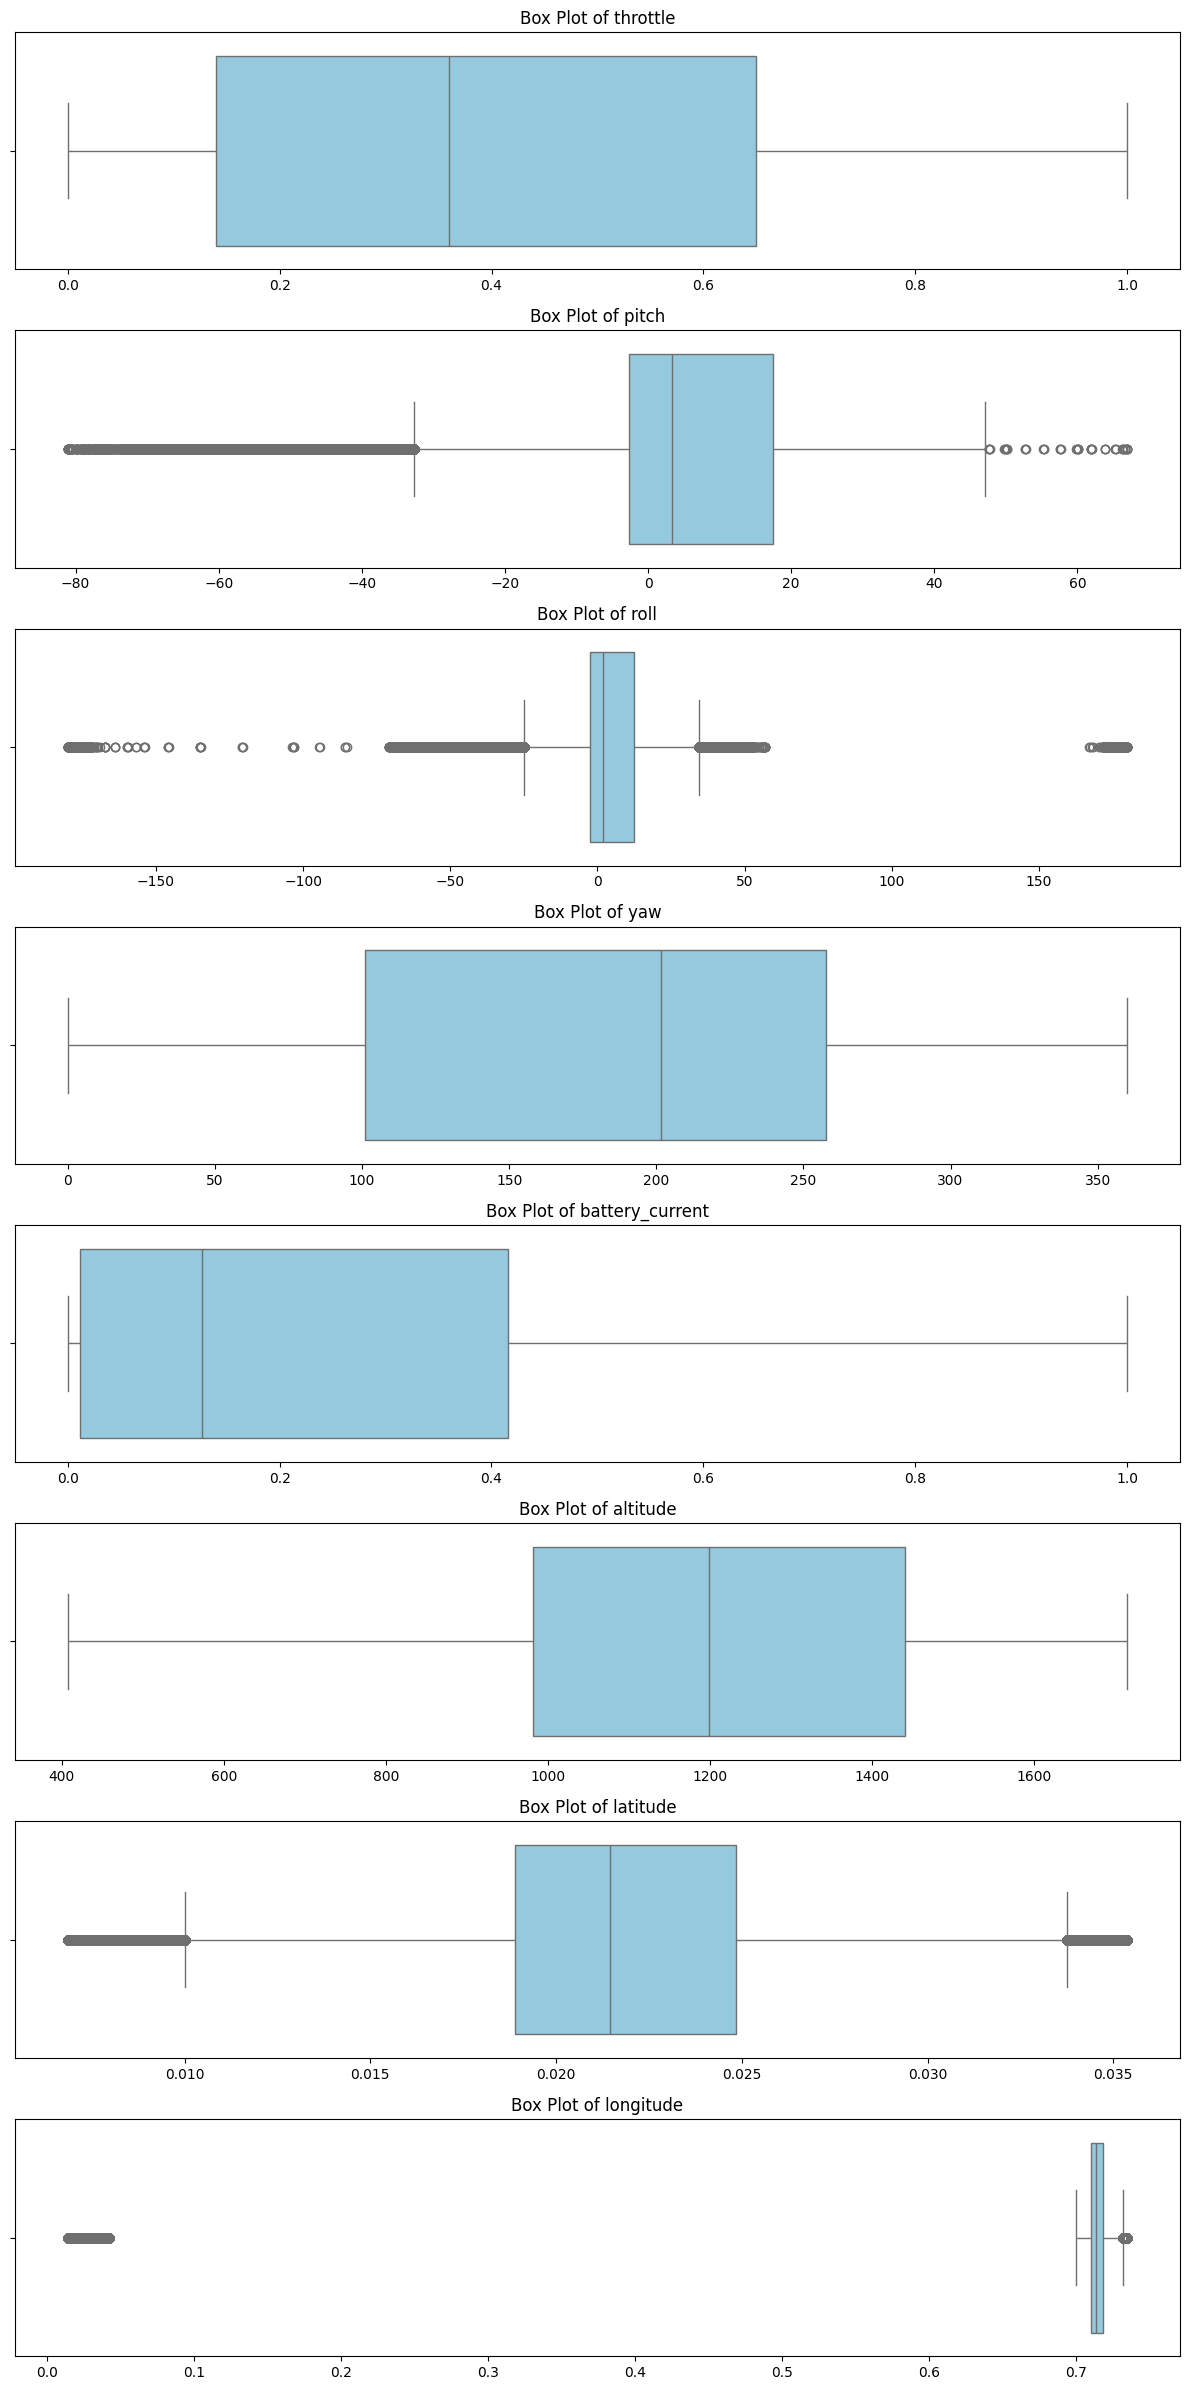

In [18]:
numerical_cols = ['throttle', 'pitch', 'roll', 'yaw', 'battery_current', 'altitude', 'latitude', 'longitude']

df[numerical_cols].hist(figsize=(14, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Flight Parameters and Battery Current")
plt.show()

plt.figure(figsize=(12, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Box Plot of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()

# Categorical/Time-based Analysis

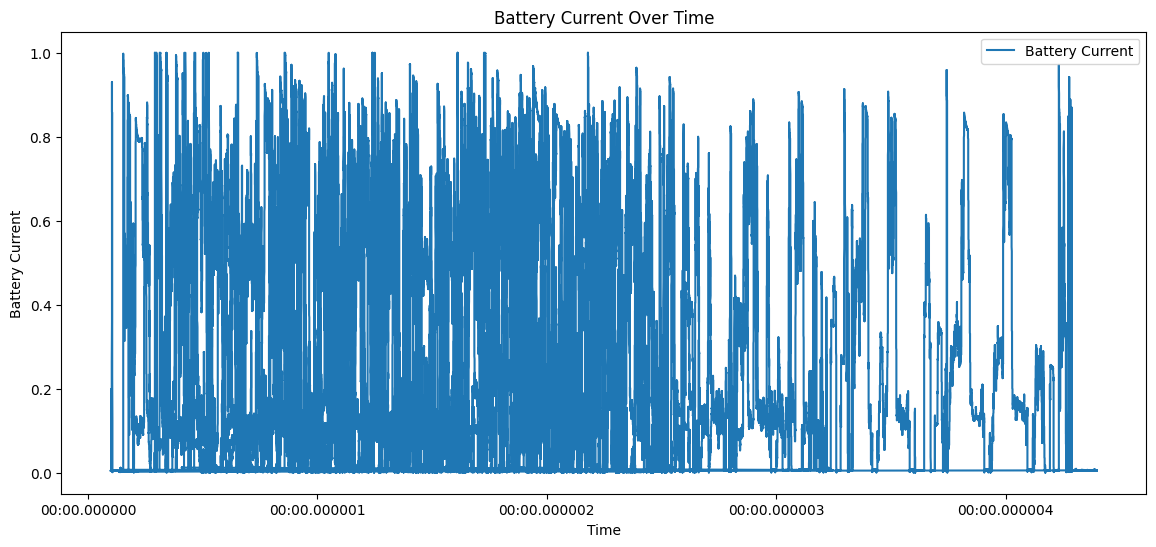

In [24]:
# Convert timestamp to datetime if needed and set it as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plot battery_current over time to see trends
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['battery_current'], label='Battery Current')
plt.xlabel('Time')
plt.ylabel('Battery Current')
plt.title('Battery Current Over Time')
plt.legend()
plt.show()


# Correlation Analysis

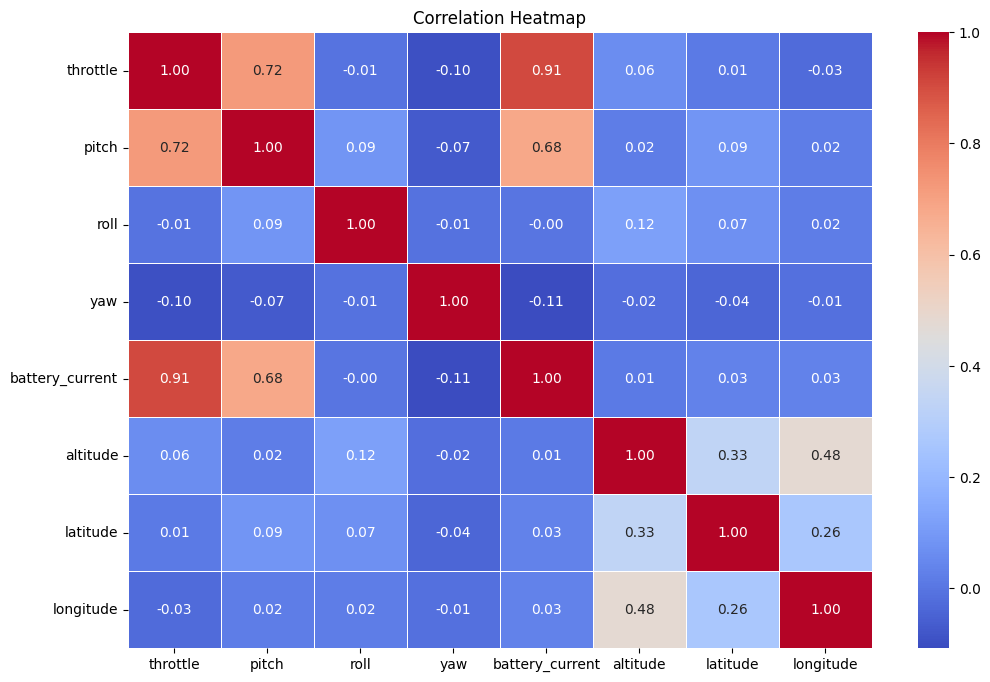

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
